# AI305 - Support Vector Machines

- [1 Support Vector Classifier](#1-Support-Vector-Classifier)
- [2 Support Vector Machine](#2-Support-Vector-Machine)
- [3 ROC Curves](#3-ROC-Curves)
- [Activity](#Activity)
- [1 SVM with Multiple Classes](#4-SVM-with-Multiple-Classes)
- [2 Application to Gene Expression Data](#5-Application-to-Gene-Expression-Data)

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline
plt.style.use('seaborn-v0_8-white')

Seaborn is a Python data visualization library based on matplotlib integrates closely with pandas data structures.
It provides a high-level interface for drawing attractive and informative statistical graphics. https://seaborn.pydata.org/

Plots are basically used for visualizing the relationship between variables. Those variables can be either completely numerical or a category like a group, class, or division. Seaborn divides the plot into the below categories:

* Relational plots: This plot is used to understand the relation between two variables.
* Categorical plots: This plot deals with categorical variables and how they can be visualized.
* Distribution plots: This plot is used for examining univariate and bivariate distributions
* Regression plots: The regression plots in Seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.
* Matrix plots: A matrix plot is an array of scatterplots.
* Multi-plot grids: It is a useful approach to draw multiple instances of the same plot on different subsets of the dataset.





## LAB

### 1 Support Vector Classifier

Define a function to plot a classifier with support vectors.

In [20]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

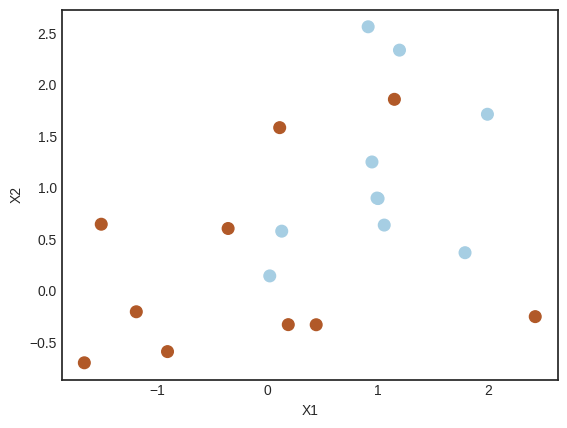

In [23]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [ ]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)
plot_svc(svc, X, y)

In [ ]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

#### GridSearchCV for finding the optimal value of C by cross-validation

![image.png](attachment:image.png)



In [ ]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

In [ ]:
# 0.001 is best according to GridSearchCV.
clf.best_params_

In [ ]:
# Generating test data
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [ ]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
#confusion matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

In [ ]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)
# The misclassification is the same

In [ ]:
plot_svc(svc3, X, y)

In [ ]:
# Changing the test data so that the classes are really seperable with a hyperplane.
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [ ]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)

In [ ]:
plot_svc(svc4, X_test, y_test)

In [ ]:
# Increase the margin. Now there is one misclassification: increased bias, lower variance.
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

In [ ]:
plot_svc(svc5, X_test, y_test)

### 2 Support Vector Machine

In [ ]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

In [ ]:
plot_svc(svm, X_train, y_train)

In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

In [ ]:
plot_svc(svm2, X_train, y_train)

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

In [ ]:
clf.best_params_

In [ ]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

In [ ]:
pd.DataFrame(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)), index=clf.best_estimator_.classes_, columns=clf.best_estimator_.classes_)

In [ ]:
# 15% of test observations misclassified
clf.best_estimator_.score(X_test, y_test)

### 3 ROC Curves

Comparing the ROC curves of two models on train/test data. One model is more flexible than the other.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

In [ ]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

As expected, the more flexible model scores better on training data but worse on the test data.

# Activity

### SVM with Multiple Classes
Apply SVM on the following mutlti-class dataset
Try multiple configurations and report your answers

In [3]:
# Adding a third class of observations
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

NameError: name 'X' is not defined

### Application to Gene Expression Data

Examine the Khan data set, which consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available. The data set consists of training data, xtrain and ytrain, and testing data, xtest and ytest.

Apply multiple configurations and report your answers

In [ ]:
X_train = pd.read_csv('Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

In [ ]:
# y_train counts
pd.Series(y_train).value_counts(sort=False)

In [ ]:
# y_test counts
pd.Series(y_test).value_counts(sort=False)